# Algorithme d'intelligence artificiel

Base de donnée : dossier 2019, hash : 7812f3c2a5ab980c3d0041d97129e0b10e2926bb, fichier de base de donnée : database-2019, hash : 14991a36b6eac28953cd16ad0113803ee9e42c5a

In [1]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import tools
from checksumdir import dirhash
import hashlib
from confusion_matrix.confusion_matrix import plot_confusion_matrix_from_data

# hash directory : https://pypi.org/project/checksumdir/1.0.5/
directory = '../data/data-IA'
database = '../data/database-2019.csv'

sha1hashdir = dirhash(directory, 'sha1')
sha1hashfile = hashlib.sha1()

with open(database, 'rb') as f:
    while True:
        data = f.read()
        if not data:
            break
        sha1hashfile.update(data)

print(sha1hashdir)
print(sha1hashfile.hexdigest())

7812f3c2a5ab980c3d0041d97129e0b10e2926bb
14991a36b6eac28953cd16ad0113803ee9e42c5a


## Get and split Data

In [2]:
X, y = tools.getData(database, directory)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Support vector machine

In [3]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

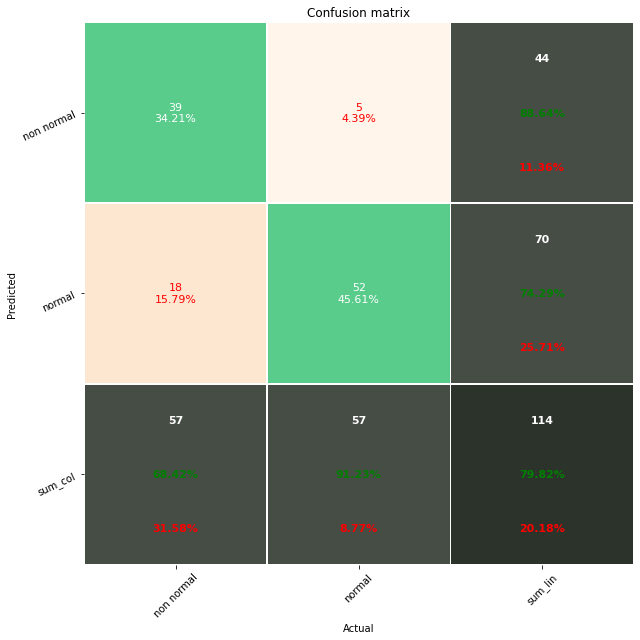

In [5]:
predictions = clf.predict(X_test)
plot_confusion_matrix_from_data(y_test, predictions,columns=['non normal','normal'])